### 1. Importing Essential Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

print("সব লাইব্রেরি লোড হয়েছে!")

সব লাইব্রেরি লোড হয়েছে!


### 2. Loading the Credit Card Transaction Dataset

In [4]:
url = "https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv"
df = pd.read_csv(url)

print("ডাটা লোড সাকসেসফুল!")
print("মোট কলাম আছে:", df.columns)
df.head()

ডাটা লোড সাকসেসফুল!
মোট কলাম আছে: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### 3. Feature Scaling (Normalizing Amount and Time)

In [5]:

rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time','Amount'], axis=1, inplace=True)

print("স্কেলিং শেষ! এখন সব ডাটা একই মাপে আছে।")
df.head()

স্কেলিং শেষ! এখন সব ডাটা একই মাপে আছে।


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


### 4. Data Splitting: Training vs. Testing Sets

In [6]:
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("ট্রেনিং ডাটার সাইজ:", X_train.shape)
print("টেস্টিং ডাটার সাইজ:", X_test.shape)

ট্রেনিং ডাটার সাইজ: (227845, 30)
টেস্টিং ডাটার সাইজ: (56962, 30)


### 5. Applying SMOTE (Synthetic Minority Over-sampling Technique)

In [7]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("SMOTE করার আগে ফ্রড সংখ্যা ছিল:", sum(y_train==1))
print("SMOTE করার পর এখন ফ্রড সংখ্যা:", sum(y_train_res==1))

SMOTE করার আগে ফ্রড সংখ্যা ছিল: 394
SMOTE করার পর এখন ফ্রড সংখ্যা: 227451


### 6. Training the XGBoost Classifier Model

In [8]:
model = xgb.XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)
model.fit(X_train_res, y_train_res)

print("মডেল ট্রেইনিং সম্পন্ন হয়েছে!")

মডেল ট্রেইনিং সম্পন্ন হয়েছে!


### 7. Performance Evaluation & Confusion Matrix Visualization

মডেলের পারফরম্যান্স রিপোর্ট:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.35      0.88      0.50        98

    accuracy                           1.00     56962
   macro avg       0.67      0.94      0.75     56962
weighted avg       1.00      1.00      1.00     56962



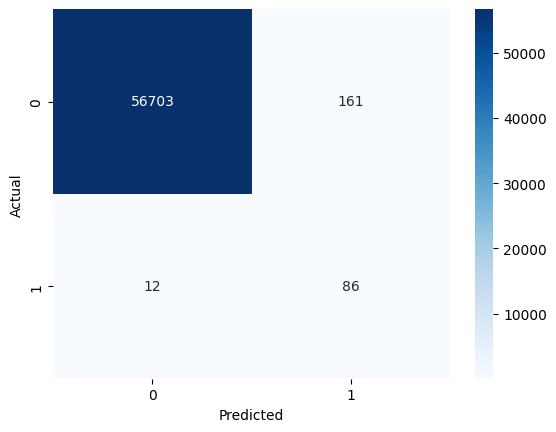

In [9]:
y_pred = model.predict(X_test)

print("মডেলের পারফরম্যান্স রিপোর্ট:")
print(classification_report(y_test, y_pred))

# গ্রাফের মাধ্যমে দেখা
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 8. Explainable AI: Feature Importance with SHAP

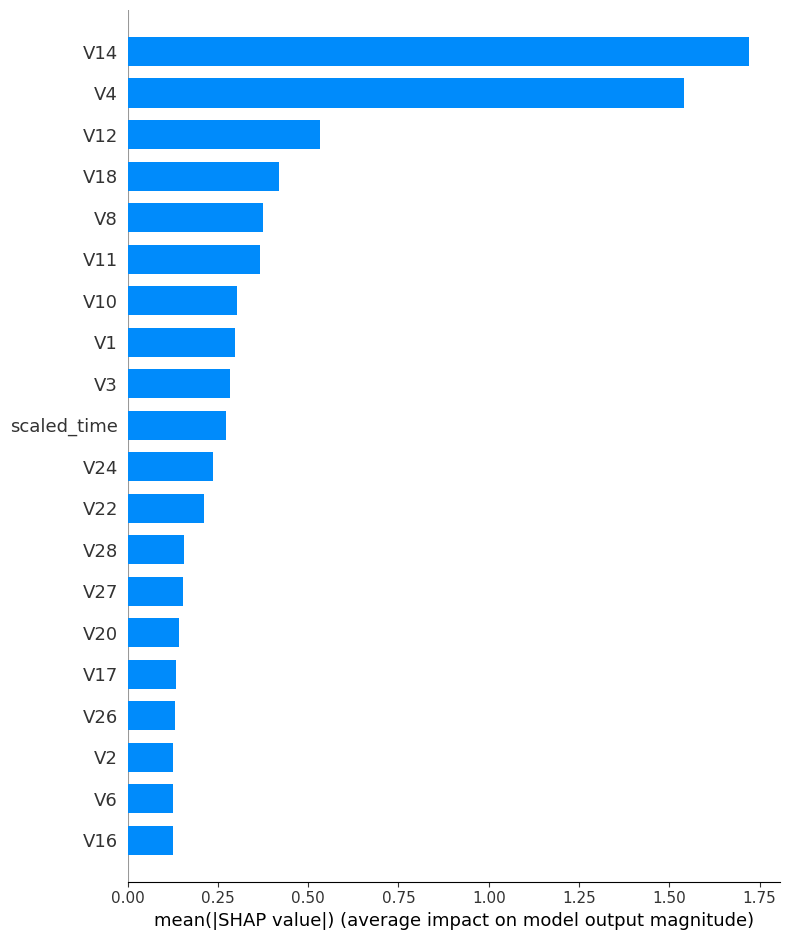

In [10]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

### 9. Saving the Model for Future Use

In [11]:
import joblib
joblib.dump(model, 'fraud_shield_model.pkl')
joblib.dump(rob_scaler, 'scaler.pkl')

print("Model and Scaler saved successfully!")

Model and Scaler saved successfully!
